**Machine learning project**

In [1]:
# Import all necessary libraries for Step 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Sklearn metrics for evaluation
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve
)

# Set global plot style
sns.set(style="whitegrid")


In [2]:
# Load dataset
df = pd.read_csv("heart.csv")

# Basic overview
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
print("First five rows:")
display(df.head())

print("\nDataset info:")
df.info()

print("\nSummary statistics:")
display(df.describe().T)

Shape: 1025 rows × 14 columns

First five rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Total missing values: 0
Total duplicated rows: 723

--- Target Variable Distribution ---


,count,percent
target,,
0,499,48.68
1,526,51.32


C:\Users\paull\AppData\Local\Temp\ipykernel_23124\3314913201.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="target", data=df, palette="pastel", legend=False)


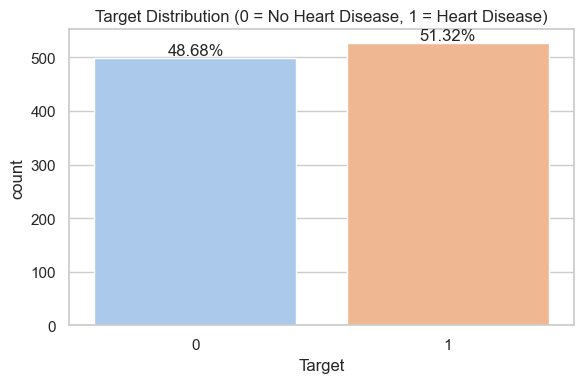

In [4]:
# Missing values and duplicates
total_missing = df.isnull().sum().sum()
total_dupes = df.duplicated().sum()
print(f"Total missing values: {total_missing}")
print(f"Total duplicated rows: {total_dupes}")

# Target distribution ('condition')
print("\n--- Target Variable Distribution ---")
target_counts = df['target'].value_counts().sort_index()
target_pct = (target_counts / target_counts.sum() * 100).round(2)
target_table = pd.DataFrame({"count": target_counts, "percent": target_pct})
display(target_table)

# 3) Visualize target distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="target", data=df, palette="pastel", legend=False)
plt.title("Target Distribution (0 = No Heart Disease, 1 = Heart Disease)")
plt.xlabel("Target")
plt.ylabel("count")

# annotate bars with percentages
for p, pct in zip(ax.patches, target_pct.tolist()):
    ax.annotate(f"{pct}%", (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom")

plt.tight_layout()
plt.savefig("step1_target_distribution.png", dpi=150)
plt.show()


**Analysis:**

The data is clean: 0 missing values and 723 duplicates.

The target is well-balanced: ~54% "No Disease" (0) and ~46% "Disease" (1). This is excellent, as we won't need complex resampling techniques (like SMOTE) for our baseline model.